#### Author : Snigdha Prakash
#### Created on May 16 2020
#### Purpose : Created for practice and to guide the learners in data science journey
#### Development status: 
####   1. May 16, 2020 : Initial development
####   2. Aug 15, 2020 : Data Visualization added

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'F:\\Snigdha-Upgrad\\Codes\\mutualFundAnalysis'

In [3]:
#read csv file
mf_data = pd.read_csv("eda.csv")

In [4]:
#Function blocks

#Defining a function to find the number of rows and columns in the dataset
def get_rows_cols(df):
    no_of_rows = df.shape[0]
    no_of_cols = df.shape[1]
    print("Number of rows in the dataset : " + str(no_of_rows) + "\nNumber of columns in the dataset : " + str(no_of_cols))

def rename_columns(df,colname_list):
    try:
        df.columns = colname_list
        print("Columns renamed successfully")
    except:
        raise ValueError("Unable to rename columns")
    return df

def percent_nan(df,colname):
    num_of_nan = df[colname].isnull().sum()
    per_nan = num_of_nan*100/df.shape[0]
    return per_nan
    
def calc_total_net_assets(x):
    if x['currency'] == 'INR':
        value = x['total_net_assets'] * 0.013
    else:
        value = x['total_net_assets']
    return value

In [5]:
#Getting dimension of dataframe
get_rows_cols(mf_data) 

#Renaming the columns
#colname_list = ["fund_name","fund_family","investment","size","total_net_assets","currency","conversion_rate","net_annual_expenses","morningstar_rating","inception_date","portfolio_cash","portfolio_cash Amount","portfolio_stocks","portfolio_stocks amount","portfolio_bonds","portfolio_bonds amount","portfolio_others","portfolio_others amount","portfolio_preferred","portfolio_preferred amount","portfolio_convertible","portfolio_convertible amount","sectors_basic_materials","sectors_basic_materials amount","sectors_consumer_cyclical","sectors_consumer_cyclical amount","sectors_financial_services","sectors_financial_services amount","sectors_real_estate","sectors_real_estate amount","sectors_consumer_defensive","sectors_consumer_defensive amount","sectors_healthcare","sectors_healthcare amount","sectors_utilities","sectors_utilities amount","sectors_communication_services","sectors_communication_services amount","sectors_energy","sectors_energy amount","sectors_industrials","sectors_industrials amount","sectors_technology","sectors_technology amount","price_earning","morningstar_return_rating","returns_ytd","returns_2017","returns_2016","morningstar_risk_rating","alpha_3y","beta_3y","mean_annual_return_3y","standard_deviation_3y","sharpe_ratio_3y","treynor_ratio_3y"]
#mf_data = rename_columns(mf_data,colname_list)

#Displaying the columns in dataframe
mf_data_cols = list(mf_data.columns)
#mf_data_cols

Number of rows in the dataset : 25304
Number of columns in the dataset : 57


In [6]:
#Summary of the tasks planned

#Finding null values/missing values
#Missing value imputation
#Text process - all small/all caps/incorrect naming
#INR to USD conversion
#Check if date is in correct format
#cash+stock+bonds+others+preferred+convertible = 100
#all sectors adds upto 100
#derived metrics based on date
#derived metric for average return
#correlation metrics
#plots

In [7]:
#Find the number of null values/missing values 
mf_data.isnull().sum()

#Can you store the result in a dataframe and try to filter the values only greater than 0?
mf_data_findnull = pd.DataFrame(mf_data.isnull().sum())
mf_data_findnull.reset_index(level=0, inplace=True)
mf_data_findnull.columns = ['Fund_Name','Num_of_missingVal']

mf_data_findnull[mf_data_findnull.Num_of_missingVal > 0]

,Fund_Name,Num_of_missingVal


In [8]:
column_missing_data = ['net_annual_expenses','morningstar_rating','inception_date','portfolio_cash','portfolio_cash Amount','portfolio_stocks amount','portfolio_stocks','portfolio_bonds','portfolio_bonds amount','portfolio_others','portfolio_others amount','portfolio_preferred','portfolio_preferred amount','portfolio_convertible','portfolio_convertible amount','sectors_basic_materials','sectors_basic_materials amount','sectors_consumer_cyclical','sectors_consumer_cyclical amount','sectors_financial_services','sectors_financial_services amount','sectors_real_estate','sectors_real_estate amount','sectors_consumer_defensive','sectors_consumer_defensive amount','sectors_healthcare','sectors_healthcare amount','sectors_utilities','sectors_utilities amount','sectors_communication_services','sectors_communication_services amount','sectors_energy','sectors_energy amount','sectors_industrials','sectors_industrials amount','sectors_technology','sectors_technology amount','price_earning','morningstar_return_rating','returns_ytd','returns_2017','returns_2016','morningstar_risk_rating','alpha_3y','beta_3y','mean_annual_return_3y','standard_deviation_3y','sharpe_ratio_3y','treynor_ratio_3y']
#List comprehension
percent_nan_list = [col+' : '+str(percent_nan(mf_data,col)) for col in column_missing_data] 
percent_nan_list

##Task - Can you write a code to check if the percentage of missing values is within a limit say 5%?
percent_nan_list_5per = [col+' : '+str(percent_nan(mf_data,col)) for col in column_missing_data if percent_nan(mf_data,col) > 0.05] 
percent_nan_list_5per

[]

In [9]:
mf_data.head()

,fund_name,fund_family,investment,size,total_net_assets,currency,conversion_rate,net_annual_expenses,morningstar_rating,inception_date,...,returns_2017,returns_2016,morningstar_risk_rating,alpha_3y,beta_3y,mean_annual_return_3y,standard_deviation_3y,sharpe_ratio_3y,treynor_ratio_3y,add_portfolio
0,Deutsche Real Assets A,Deutsche Asset Management,Blend,Large,486740000.0,USD,75.47,1.22,2,29/07/2007,...,14.67,4.01,3,-1.96,0.84,0.26,7.16,0.35,2.70,100.01
1,Aberdeen Income Builder A,Aberdeen,Value,Large,9980000.0,USD,75.47,1.44,2,29/12/2011,...,17.05,11.26,3,-4.84,1.00,0.51,10.62,0.51,5.04,100.00
2,Thrivent Large Cap Growth A,Thrivent,Growth,Large,997620000.0,USD,75.47,1.20,3,28/10/1999,...,27.70,-2.26,4,1.04,1.10,1.08,12.91,0.96,11.15,100.00
3,Horizon Active Asset Allocation Investor,Horizon Investments,Blend,Large,451260000.0,USD,75.47,1.36,5,30/01/2012,...,22.25,4.56,4,-1.87,1.64,0.62,10.79,0.63,3.94,99.99
4,Deutsche Real Assets C,Deutsche Asset Management,Blend,Large,486740000.0,USD,75.47,1.97,1,29/07/2007,...,13.69,3.24,3,-2.77,0.85,0.20,7.21,0.24,1.76,100.01


In [10]:
#Listing down categorical and numerical columns
mf_data_cat_cols = ['fund_name','fund_family','investment','size','morningstar_rating','morningstar_return_rating','morningstar_risk_rating']
mf_data_num_cols = [col for col in mf_data_cols if col not in mf_data_cat_cols]

#Finding the percentage of missing values in categorical columns
percent_nan_cat_list = [col+' : '+str(percent_nan(mf_data,col)) for col in mf_data_cat_cols]
percent_nan_cat_list

['fund_name : 0.0',
 'fund_family : 0.0',
 'investment : 0.0',
 'size : 0.0',
 'morningstar_rating : 0.0',
 'morningstar_return_rating : 0.0',
 'morningstar_risk_rating : 0.0']

In [11]:
#Finding the percentage of missing values in numerical columns
percent_nan_num_list = [col+' : '+str(percent_nan(mf_data,col)) for col in mf_data_num_cols]
percent_nan_num_list

percent_nan_num_list_5per = [col+' : '+str(percent_nan(mf_data,col)) for col in mf_data_num_cols if percent_nan(mf_data,col) > 0.05] 
percent_nan_num_list_5per

[]

In [12]:
#Missing value imputation for categorical variable
#Removing the rows since percent of na values < 5%
mf_data = mf_data.dropna(how='any',axis=0) 

In [13]:
#portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertible should add upto 100%
#Find which rows doesn't align

mf_data_morphed = mf_data
mf_data_morphed['add_portfolio'] = mf_data_morphed['portfolio_cash'] + mf_data_morphed['portfolio_stocks'] + mf_data_morphed['portfolio_bonds']  + mf_data_morphed['portfolio_others'] + mf_data_morphed['portfolio_preferred'] + mf_data_morphed['portfolio_convertible']

#Remove the rows where the add amount = 0
mf_data_morphed = mf_data_morphed[mf_data_morphed['add_portfolio'] > 0]

list(mf_data_morphed[mf_data_morphed['add_portfolio'] < 99]['add_portfolio'])

##Task - Why are some rows having add amount <> 100? How can we impute these?

[]

In [14]:
#Finding unique values in categorical columns
print(mf_data_morphed['fund_name'].unique())
print(mf_data_morphed['fund_family'].unique())
print(mf_data_morphed['investment'].unique())
print(mf_data_morphed['size'].unique())


['Deutsche Real Assets A' 'Aberdeen Income Builder A'
 'Thrivent Large Cap Growth A' ... 'Zevenbergen Genea Investor'
 'Zevenbergen Growth Investor' 'Zevenbergen Growth Institutional']
['Deutsche Asset Management' 'Aberdeen' 'Thrivent' 'Horizon Investments'
 'American Century Investments' 'American Funds' 'Cavanal Hill funds'
 'Putnam' 'American Beacon' 'Allianz Funds' 'Invesco' 'Aasgard' 'Alger'
 'Ancora' 'Absolute Capital' 'AllianceBernstein' 'American Independence'
 'AMG Funds' 'Columbia' 'AmericaFirst Funds' 'ABR' 'Abbey Capital'
 'RBC Global Asset Management.' 'Arbitrage Fund' 'Salient Funds' 'Voya'
 'AC ONE' 'Catalyst Mutual Funds' 'AQR Funds' 'Adalta' 'Azzad Fund'
 'Adirondack Funds' '361 Funds' 'ACM' 'Advisory Research'
 'Ariel Investments' 'Acadian Funds' 'Transamerica' 'Ascendant'
 'Yorktown Funds' 'ProFunds' 'Angel Oak' 'Anfield' 'AFBA 5Star Fund' 'AAM'
 'Meeder Funds' 'PGIM Investments' 'AGF Investments' 'Acuitas Investments'
 'Affinity' 'Wilmington Funds' 'Akre' 'Leavell' 

In [15]:
#Large, Lrg, lrg --> Medium, Med, medium --> Others --> Small, small 
#Converting the case of the size column

value_change = {'large' : 'large',
                 'lrg' : 'large',
                 'medium' : 'medium',
                 'med' : 'medium',
                 'small' : 'small',
                 'others' : 'others'}

pd.set_option('chained_assignment',None)
mf_data_morphed.loc[:,'size'] = mf_data_morphed.loc[:, 'size'].str.lower()

mf_data_morphed['size'] = mf_data_morphed['size'].map(value_change)

##Task - What other ways can you sync the variations in categorical column?
##Task - Can you analyse the remaining categorical columns to find anomalies and fix them?

In [16]:
mf_data_morphed.head()
mf_data_morphed.shape

(25304, 57)

In [17]:
#Checking the dimension of the dataset and checking for nan in the morphed dataset after changes
print(mf_data_morphed.shape)
percent_nan_list = [col+' : '+str(percent_nan(mf_data_morphed,col)) for col in column_missing_data] 
percent_nan_list

#Why is this check needed?

#Check if there are rows in 'total_net_assets' that are non-numeric
mf_tna_non_numeric = mf_data_morphed[pd.to_numeric(mf_data_morphed['total_net_assets'], errors='coerce').isnull()]

print(mf_tna_non_numeric.shape)

#Using the function - calc_total_net_assets created above        
mf_data_morphed['total_net_assets_adj'] = mf_data_morphed.apply(calc_total_net_assets, axis = 1)
mf_data_morphed['currency'] = 'USD'

##Task - Can you check if the conversion of INR to USD happened correctly for total_net_assets?

(25304, 57)
(0, 57)


In [18]:
##Task - Can you create a derived metrics to find how old the mutual fund is? Use inception_date

In [19]:
#mf_data_morphed[['inception_date','mf_age']].head(4)
#mf_data_morphed.dtypes

In [20]:
mf_data_morphed['inception_date']= pd.to_datetime(mf_data_morphed['inception_date']).dt.date
mf_data_morphed['mf_age'] = datetime.datetime.now().date() - mf_data_morphed['inception_date']

#Since mf_age are in days, removing the keyword "days" from mf_age column
mf_data_morphed['mf_age'] = mf_data_morphed['mf_age'].astype('str')
mf_data_morphed['mf_age'] = mf_data_morphed['mf_age'].str.replace('days 00:00:00.000000000','')

In [21]:
mf_data_morphed[['inception_date','mf_age']].head(4)

,inception_date,mf_age
0,2007-07-29,4767
1,2011-12-29,3153
2,1999-10-28,7598
3,2012-01-30,3121


In [22]:
#Dataset re-validation
print(mf_data_morphed.shape)
column_missing_data = ['mf_age']
percent_nan_list = [col+' : '+str(percent_nan(mf_data_morphed,col)) for col in column_missing_data] 
percent_nan_list

(25304, 59)


['mf_age : 0.0']

In [23]:
#Calculating average 3 years return
mf_data_morphed['avg_return_3_years'] = (mf_data_morphed['returns_ytd'] + mf_data_morphed['returns_2017'] + mf_data_morphed['returns_2016'])/3

In [24]:
#mf_data_morphed[['fund_name','fund_family','returns_ytd','returns_2017','returns_2016']].head()
mf_data_morphed[['fund_name','fund_family','returns_ytd','returns_2017','returns_2016','avg_return_3_years']].head()

,fund_name,fund_family,returns_ytd,returns_2017,returns_2016,avg_return_3_years
0,Deutsche Real Assets A,Deutsche Asset Management,1.15,14.67,4.01,6.61
1,Aberdeen Income Builder A,Aberdeen,-1.16,17.05,11.26,9.05
2,Thrivent Large Cap Growth A,Thrivent,11.04,27.70,-2.26,12.16
3,Horizon Active Asset Allocation Investor,Horizon Investments,2.59,22.25,4.56,9.80
4,Deutsche Real Assets C,Deutsche Asset Management,0.95,13.69,3.24,5.96


In [25]:
#After doing most of the data cleaning activity, let's try some exploratory data analysis
#Find the number of funds in one fund family
mf_data_morphed[['fund_family','fund_name']].groupby('fund_family').count()

,fund_name
fund_family,
13D Activist Fund,2
1919 Funds,8
361 Funds,13
AAAMCO,2
AAM,11
...,...
Zacks Funds,6
Zeo,1
Zevenbergen Capital Investments,4


In [26]:
#Filter the fund data based on one fund family only for simple analysis - Wells Fargo Funds
mf_data_subset = mf_data_morphed[mf_data_morphed['fund_family'] == 'Wells Fargo Funds']

In [27]:
mf_data_subset.head()

,fund_name,fund_family,investment,size,total_net_assets,currency,conversion_rate,net_annual_expenses,morningstar_rating,inception_date,...,alpha_3y,beta_3y,mean_annual_return_3y,standard_deviation_3y,sharpe_ratio_3y,treynor_ratio_3y,add_portfolio,total_net_assets_adj,mf_age,avg_return_3_years
2950,Wells Fargo C&B Large Cap Value A,Wells Fargo Funds,Value,large,35510000.0,USD,75.47,1.15,3,2004-07-25,...,-2.26,0.96,0.69,10.75,0.71,7.63,100.0,35510000.0,5866,10.143333
2951,Wells Fargo C&B Large Cap Value C,Wells Fargo Funds,Value,large,35510000.0,USD,75.47,1.90,3,2004-07-25,...,-3.04,0.96,0.63,10.76,0.63,6.77,100.0,35510000.0,5866,9.443333
2952,Wells Fargo C&B Large Cap Value R6,Wells Fargo Funds,Value,large,35510000.0,USD,75.47,0.70,4,2016-10-31,...,-1.82,0.96,0.73,10.75,0.75,8.12,100.0,35510000.0,1385,-1.106667
2969,Wells Fargo C&B Large Cap Value Admin,Wells Fargo Funds,Value,large,35510000.0,USD,75.47,1.00,3,2004-07-25,...,-2.14,0.96,0.70,10.75,0.72,7.77,100.0,35510000.0,5866,10.263333
2971,Wells Fargo C&B Large Cap Value Inst,Wells Fargo Funds,Value,large,35510000.0,USD,75.47,0.80,3,2004-07-25,...,-1.87,0.96,0.72,10.75,0.74,8.06,100.0,35510000.0,5866,10.473333


In [28]:
mf_data_subset.to_csv("Well_Fargo_Funds.csv")

In [29]:
#Data Visualization

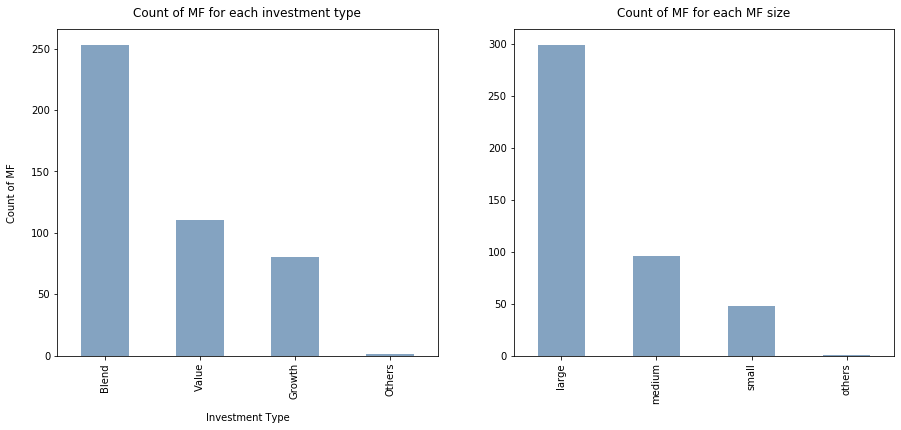

In [30]:
#Count the number of records in each investment type and size
plt.subplot(1,2,1)

mf_data_subset['investment'].value_counts().plot(kind='bar', color = (0.2, 0.4, 0.6, 0.6))
plt.xlabel("Investment Type", labelpad=14)
plt.ylabel("Count of MF", labelpad=14)
plt.title("Count of MF for each investment type", y=1.02);

plt.subplot(1,2,2)

mf_data_subset['size'].value_counts().plot(kind='bar', figsize=(15, 6), color = (0.2, 0.4, 0.6, 0.6))
plt.title("Count of MF for each MF size", y=1.02);

Text(0.5, 1, 'morningstar_risk_rating')

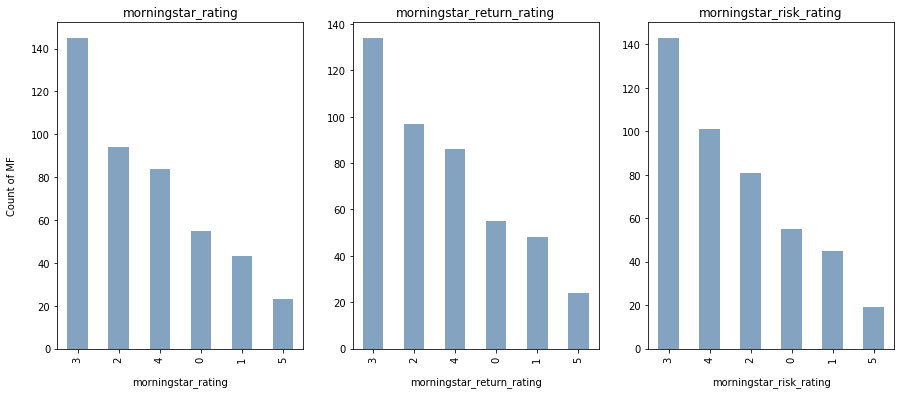

In [31]:
plt.subplot(1,3,1)
mf_data_subset['morningstar_rating'].value_counts().plot(kind='bar', color = (0.2, 0.4, 0.6, 0.6))
plt.xlabel("morningstar_rating", labelpad=14)
plt.ylabel("Count of MF", labelpad=14)
plt.title("morningstar_rating", y=1)


plt.subplot(1,3,2)
mf_data_subset['morningstar_return_rating'].value_counts().plot(kind='bar', color = (0.2, 0.4, 0.6, 0.6))
plt.xlabel("morningstar_return_rating", labelpad=14)
plt.title("morningstar_return_rating", y=1)


plt.subplot(1,3,3)
mf_data_subset['morningstar_risk_rating'].value_counts().plot(kind='bar', figsize=(15, 6), color = (0.2, 0.4, 0.6, 0.6))
plt.xlabel("morningstar_risk_rating", labelpad=14)
plt.title("morningstar_risk_rating", y=1)

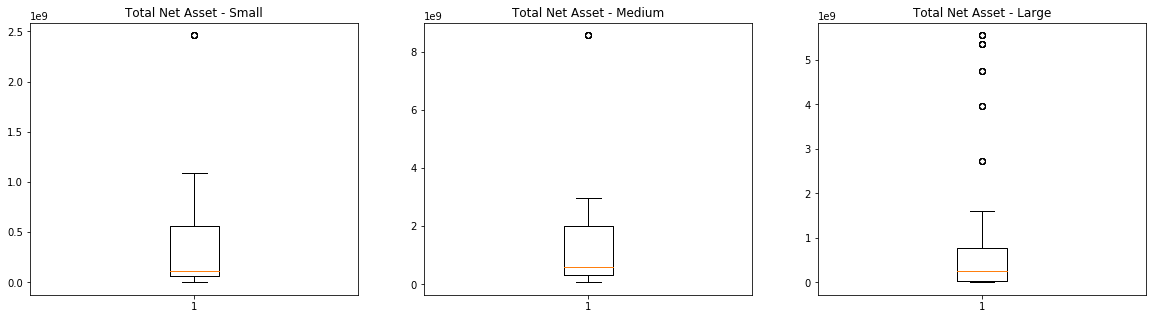

In [32]:
fig1, ax1 = plt.subplots(1,3,figsize=(20, 5))

data = mf_data_subset['total_net_assets_adj'][mf_data_subset['size'] == 'small']
ax1[0].set_title('Total Net Asset - Small')
ax1[0].boxplot(data)

data = mf_data_subset['total_net_assets_adj'][mf_data_subset['size'] == 'medium']
ax1[1].set_title('Total Net Asset - Medium')
ax1[1].boxplot(data)

data = mf_data_subset['total_net_assets_adj'][mf_data_subset['size'] == 'large']
ax1[2].set_title('Total Net Asset - Large')
ax1[2].boxplot(data)

plt.show()

Text(0, 0.5, 'Frequency')

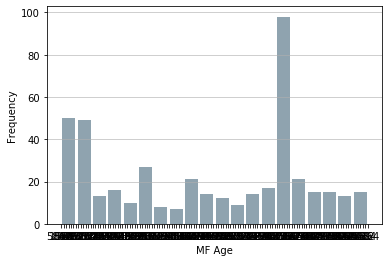

In [33]:
data = mf_data_subset['mf_age']
n, bins, patches = plt.hist(x=data, bins=20, color='#607c8e',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('MF Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

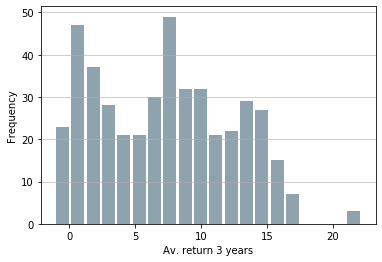

In [35]:
data = mf_data_subset['avg_return_3_years']
n, bins, patches = plt.hist(x=data, bins=20, color='#607c8e',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Av. return 3 years')
plt.ylabel('Frequency')

In [40]:
#Which fund is more prone to volatility
mf_data_subset[['fund_name','investment','size','beta_3y']][mf_data_subset['beta_3y'] == max(mf_data_subset['beta_3y'])]

,fund_name,investment,size,beta_3y
5665,Wells Fargo International Bond Inst,Growth,medium,1.97


In [43]:
#Finding the min and max volatility rate for each investment type and size

beta_3y_group = mf_data_subset.groupby(['investment', 'size']).agg({'beta_3y': ['min', 'max']})
beta_3y_group.columns = ['beta_3y_min', 'beta_3y_max']
beta_3y_group = beta_3y_group.reset_index()
print(beta_3y_group)

  investment    size  beta_3y_min  beta_3y_max
0      Blend   large         0.00         1.50
1      Blend  medium         0.71         1.08
2      Blend   small         0.67         1.08
3     Growth   large         0.43         1.29
4     Growth  medium         0.50         1.97
5     Growth   small         1.02         1.15
6     Others  others         1.03         1.03
7      Value   large         0.02         1.01
8      Value  medium         0.02         0.91
9      Value   small         0.11         1.04


In [48]:
#Finding the fund names for each of the combinations obtained earlier

#mf_data_subset[['fund_name']][(mf_data_subset['beta_3y'] == 0.00) & (mf_data_subset['investment'] == 'Blend') & (mf_data_subset['size'] == 'large')]
#mf_data_subset[['fund_name']][(mf_data_subset['beta_3y'] == 1.50) & (mf_data_subset['investment'] == 'Blend') & (mf_data_subset['size'] == 'large')]
#mf_data_subset[['fund_name']][(mf_data_subset['beta_3y'] == 0.71) & (mf_data_subset['investment'] == 'Blend') & (mf_data_subset['size'] == 'medium')]
mf_data_subset[['fund_name']][(mf_data_subset['beta_3y'] == 1.08) & (mf_data_subset['investment'] == 'Blend') & (mf_data_subset['size'] == 'medium')]

,fund_name
21257,Wells Fargo California Tax-Free A
21258,Wells Fargo California Tax-Free C


In [49]:
#Finding which fund has the potential to give excess of returns to the customers
alpha_3y_group = mf_data_subset.groupby(['investment', 'size']).agg({'alpha_3y': ['min', 'max']})
alpha_3y_group.columns = ['alpha_3y_min', 'alpha_3y_max']
alpha_3y_group = alpha_3y_group.reset_index()
print(alpha_3y_group)

  investment    size  alpha_3y_min  alpha_3y_max
0      Blend   large         -5.55          3.22
1      Blend  medium         -3.14          1.59
2      Blend   small         -5.72          8.20
3     Growth   large         -3.24         11.06
4     Growth  medium         -2.85          5.77
5     Growth   small         -2.97          0.50
6     Others  others          0.83          0.83
7      Value   large         -4.05          3.28
8      Value  medium         -3.38          0.80
9      Value   small         -0.10          2.36


In [52]:
#Finding the fund names for each of the combinations obtained earlier

#mf_data_subset[['fund_name']][(mf_data_subset['alpha_3y'] == -5.55) & (mf_data_subset['investment'] == 'Blend') & (mf_data_subset['size'] == 'large')]
#mf_data_subset[['fund_name']][(mf_data_subset['alpha_3y'] == 3.22) & (mf_data_subset['investment'] == 'Blend') & (mf_data_subset['size'] == 'large')]
#mf_data_subset[['fund_name']][(mf_data_subset['alpha_3y'] == -3.14) & (mf_data_subset['investment'] == 'Blend') & (mf_data_subset['size'] == 'medium')]
mf_data_subset[['fund_name']][(mf_data_subset['alpha_3y'] == 1.59) & (mf_data_subset['investment'] == 'Blend') & (mf_data_subset['size'] == 'medium')]

,fund_name
25058,Wells Fargo Core Plus Bond Instl


In [60]:
#Finding portfolio wise investment for a particular mutual fund
mf_data_subset_portfolio = mf_data_subset[['fund_name','portfolio_cash','portfolio_stocks','portfolio_bonds','portfolio_others','portfolio_preferred','portfolio_convertible']][(mf_data_subset['alpha_3y'] == 1.59) & (mf_data_subset['investment'] == 'Blend') & (mf_data_subset['size'] == 'medium')]

mf_data_subset_portfolio_long=pd.melt(mf_data_subset_portfolio,id_vars=['fund_name'],var_name='Portfolio', value_name='values')
mf_data_subset_portfolio_long.sort_values(by=['fund_name','values'], inplace=True,ascending=False)

mf_data_subset_portfolio_long

,fund_name,Portfolio,values
2,Wells Fargo Core Plus Bond Instl,portfolio_bonds,85.58
0,Wells Fargo Core Plus Bond Instl,portfolio_cash,10.42
3,Wells Fargo Core Plus Bond Instl,portfolio_others,3.82
4,Wells Fargo Core Plus Bond Instl,portfolio_preferred,0.18
1,Wells Fargo Core Plus Bond Instl,portfolio_stocks,0.00
5,Wells Fargo Core Plus Bond Instl,portfolio_convertible,0.00


In [66]:
#Finding sector wise investment for a particular mutual fund
mf_data_subset_sector = mf_data_subset[['fund_name','sectors_basic_materials','sectors_consumer_cyclical','sectors_financial_services','sectors_real_estate','sectors_consumer_defensive','sectors_healthcare','sectors_utilities','sectors_communication_services','sectors_energy','sectors_industrials','sectors_technology']][(mf_data_subset['alpha_3y'] == -2.26) & (mf_data_subset['investment'] == 'Value') & (mf_data_subset['size'] == 'large')]

mf_data_subset_sector_long=pd.melt(mf_data_subset_sector,id_vars=['fund_name'],var_name='Sector', value_name='values')
mf_data_subset_sector_long.sort_values(by=['fund_name','values'], inplace=True,ascending=False)

mf_data_subset_sector_long

,fund_name,Sector,values
2,Wells Fargo C&B Large Cap Value A,sectors_financial_services,28.51
1,Wells Fargo C&B Large Cap Value A,sectors_consumer_cyclical,19.25
9,Wells Fargo C&B Large Cap Value A,sectors_industrials,15.10
5,Wells Fargo C&B Large Cap Value A,sectors_healthcare,14.37
10,Wells Fargo C&B Large Cap Value A,sectors_technology,7.54
8,Wells Fargo C&B Large Cap Value A,sectors_energy,5.02
4,Wells Fargo C&B Large Cap Value A,sectors_consumer_defensive,4.42
7,Wells Fargo C&B Large Cap Value A,sectors_communication_services,3.09
3,Wells Fargo C&B Large Cap Value A,sectors_real_estate,1.67
0,Wells Fargo C&B Large Cap Value A,sectors_basic_materials,1.04
